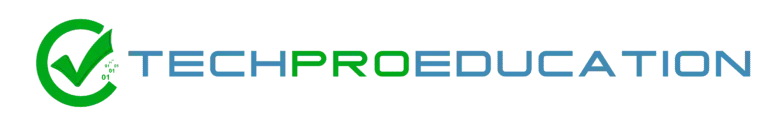

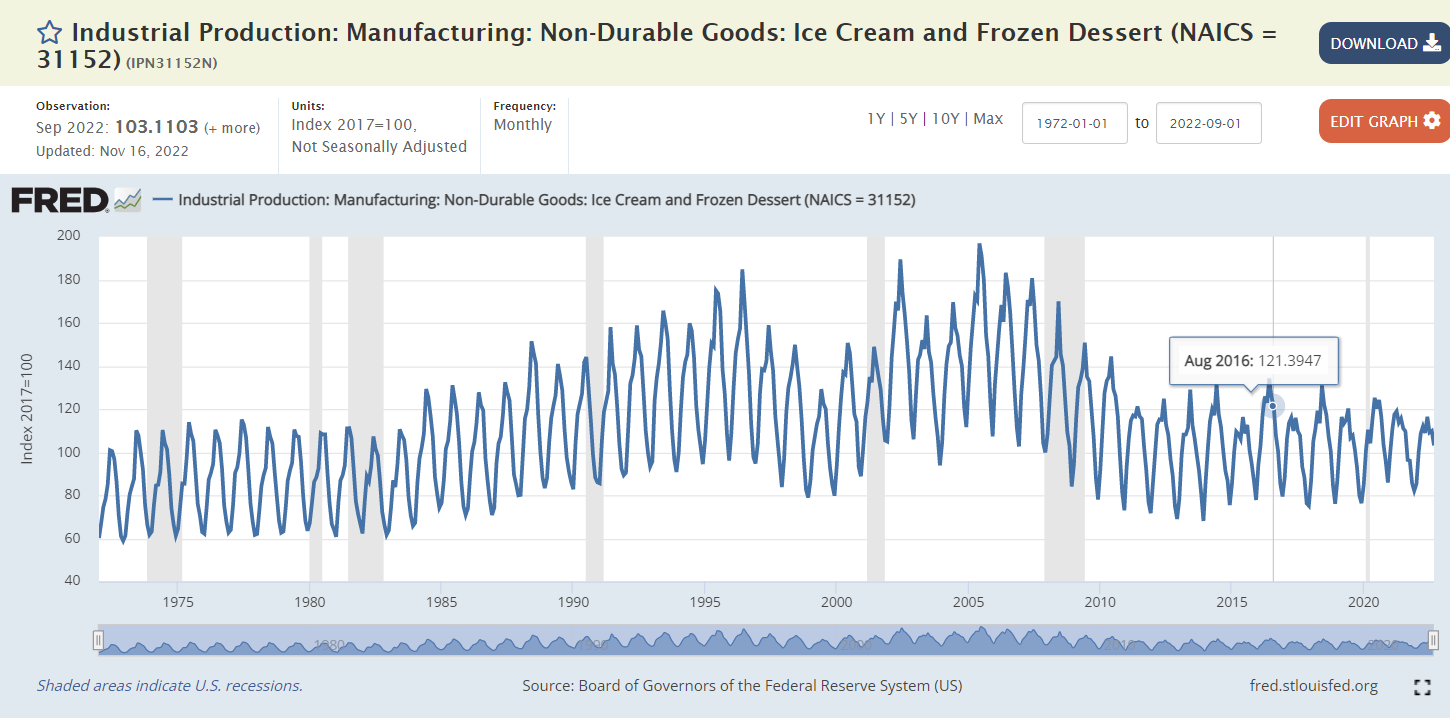

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

Bu veri, Amerika Birleşik Devletleri'ndeki "31152" endüstri sınıfı koduna sahip olan ve Dayanıklı Olmayan Mal Üretimi kategorisine dahil olan "Dondurma ve Dondurulmuş Tatlılar" üretimiyle ilgili sanayi üretimi endeksidir.

Bu endeks, ilgili işletmelerin gerçek üretimini ölçerek, bu sektördeki faaliyetlerin ekonomik performansını yansıtmayı amaçlar. Endeks değeri, 2017 yılında 100 olarak kabul edilen bir baz döneme göre hesaplanmaktadır. Mevsimsel düzeltme yapılmamıştır, yani mevsimsel etkilerin etkisi veri üzerinden çıkarılmamıştır.

Bu veri, Federal Reserve Bankası'nın FRED veritabanından elde edilebilir ve Federal Reserve Bankası tarafından düzenli olarak güncellenmektedir.

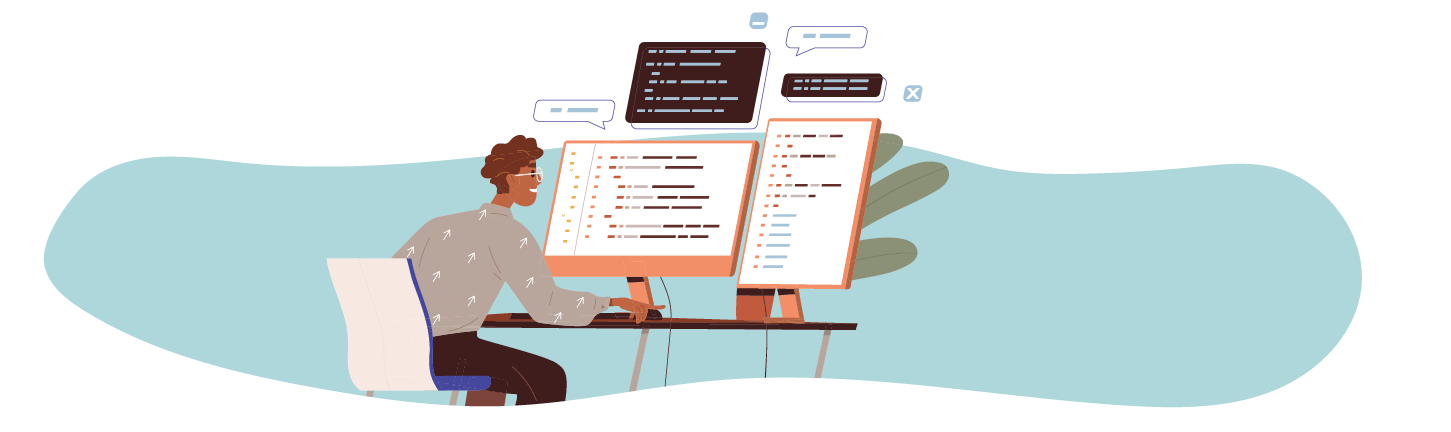

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

# Indest Data

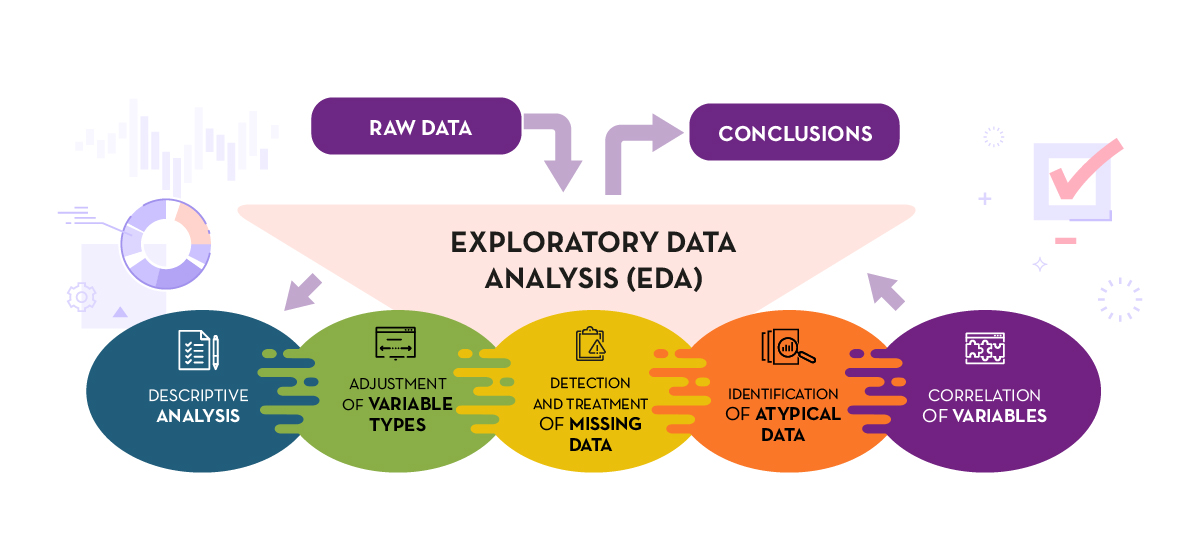

# Exploratory Data Analysis and Visualization

In [3]:
df.head()

IPN31152N
DATE                 
1972-01-01     59.962
1972-02-01     67.061
1972-03-01     74.235
1972-04-01     78.112
1972-05-01     84.764

In [4]:
df.tail()

IPN31152N
DATE                 
2019-05-01    114.561
2019-06-01    124.960
2019-07-01    110.263
2019-08-01    102.609
2019-09-01    101.587

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.columns = ['Production']

In [7]:
df.head()

Production
DATE                  
1972-01-01      59.962
1972-02-01      67.061
1972-03-01      74.235
1972-04-01      78.112
1972-05-01      84.764

<Axes: xlabel='DATE'>

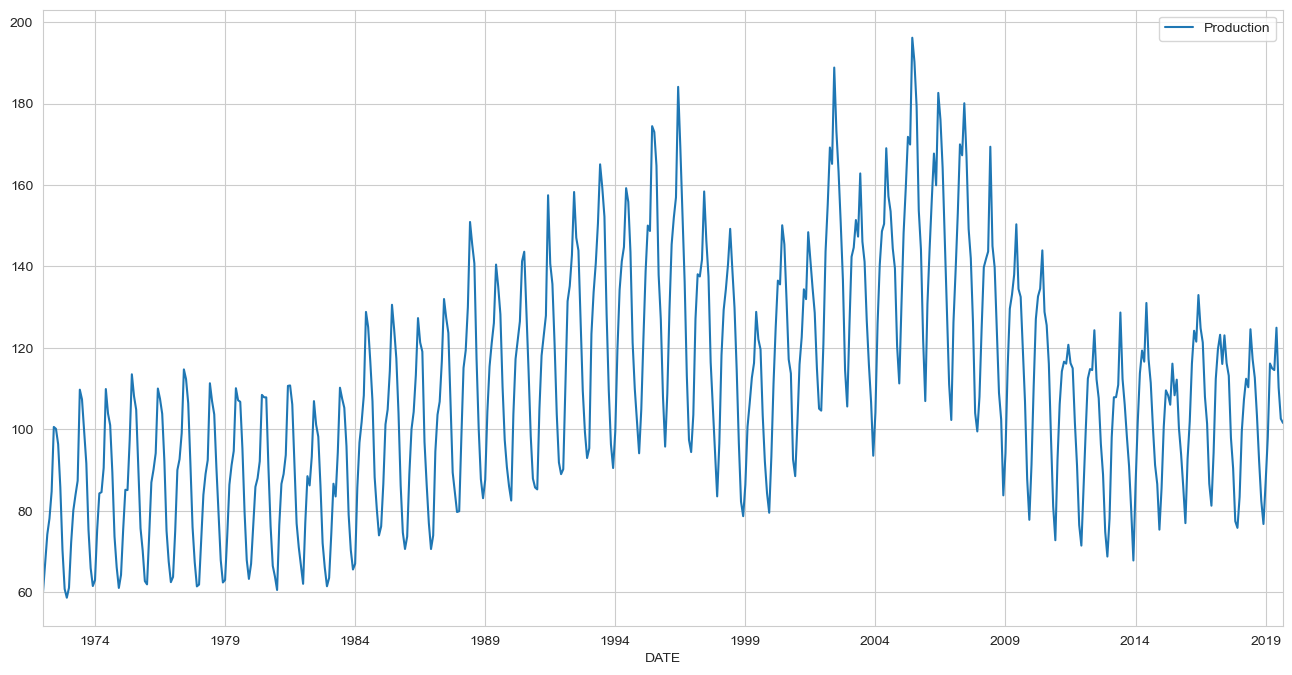

In [8]:
df.plot(figsize=(16,8))

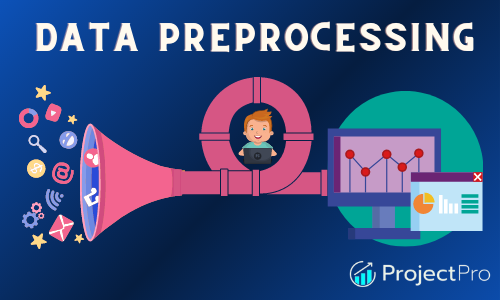

# Preprocessing of Data

## Train Test Split

In [9]:
len(df)

573

In [10]:
test_size = 24

In [11]:
test_ind = len(df)- test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
len(train)

549

In [14]:
len(test)

24

In [15]:
train

Production
DATE                  
1972-01-01      59.962
1972-02-01      67.061
1972-03-01      74.235
1972-04-01      78.112
1972-05-01      84.764
...                ...
2017-05-01     116.064
2017-06-01     123.087
2017-07-01     116.264
2017-08-01     113.172
2017-09-01      97.912

[549 rows x 1 columns]

In [16]:
test

Production
DATE                  
2017-10-01      90.473
2017-11-01      77.438
2017-12-01      75.812
2018-01-01      83.434
2018-02-01      99.490
2018-03-01     107.315
2018-04-01     112.431
2018-05-01     110.354
2018-06-01     124.584
2018-07-01     117.222
2018-08-01     112.678
2018-09-01     103.312
2018-10-01      92.132
2018-11-01      82.435
2018-12-01      76.761
2019-01-01      86.999
2019-02-01      98.112
2019-03-01     116.172
2019-04-01     114.970
2019-05-01     114.561
2019-06-01     124.960
2019-07-01     110.263
2019-08-01     102.609
2019-09-01     101.587

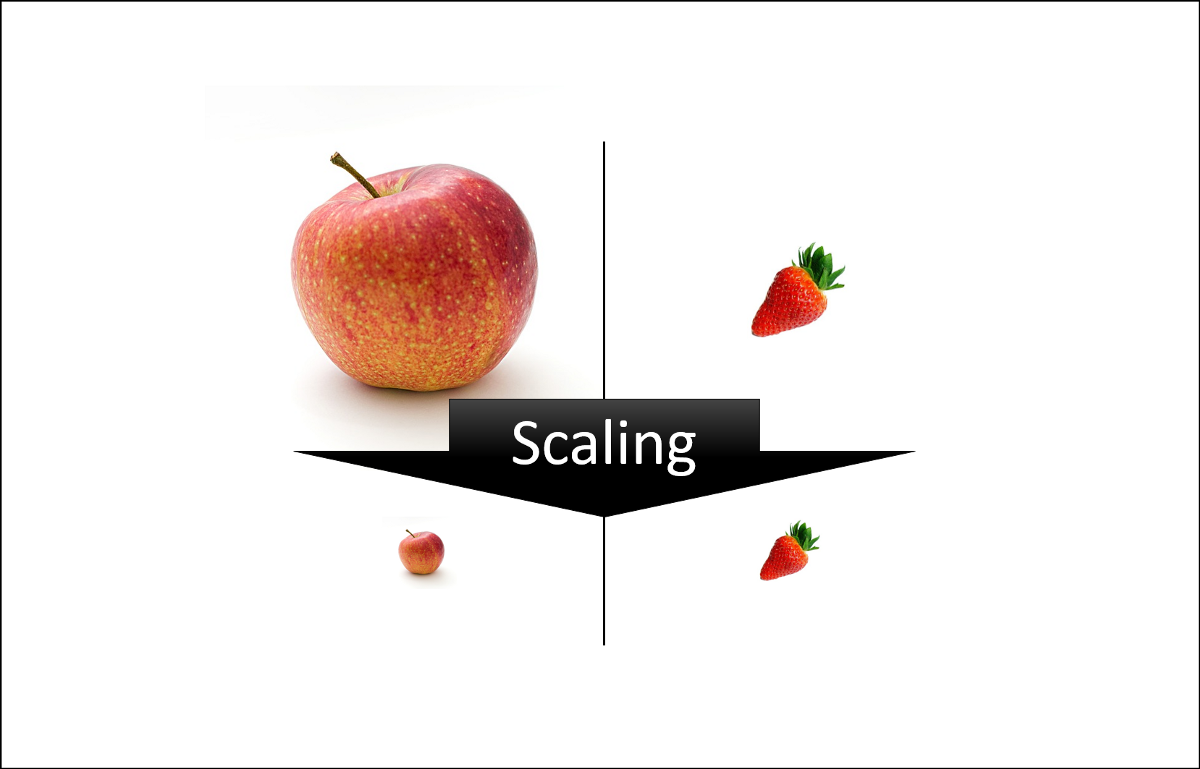

## Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Bu kod parçası, veri önişleme adımında yer almaktadır. scaler adlı bir ölçekleyici nesnesi kullanılarak, eğitim ve test verileri ölçeklendirilmektedir.

fit_transform() yöntemi, scaler nesnesini eğitim verilerine uygulayarak verileri ölçeklendirir ve dönüştürür. Eğitim verileri üzerinde ölçeklendirme işlemi yapılırken, ölçekleyici nesne eğitim verilerine uyum sağlamak için verileri analiz eder ve istatistiksel bilgileri kullanarak verileri ölçeklendirir.

Daha sonra, transform() yöntemi kullanılarak aynı ölçekleyici nesne, test verilerine uygulanır. Bu durumda, ölçekleyici nesne, eğitim verilerine dayalı olarak öğrendiği ölçekleme faktörlerini kullanarak test verilerini ölçeklendirir. Bu şekilde, eğitim ve test verileri aynı ölçeklendirme faktörlerine göre uygun bir şekilde dönüştürülür.

Bu işlem, verilerin ölçeklendirilerek aynı aralığa getirilmesini sağlar. Ölçeklendirme, modelin daha iyi performans göstermesine ve daha istikrarlı sonuçlar üretmesine yardımcı olabilir.

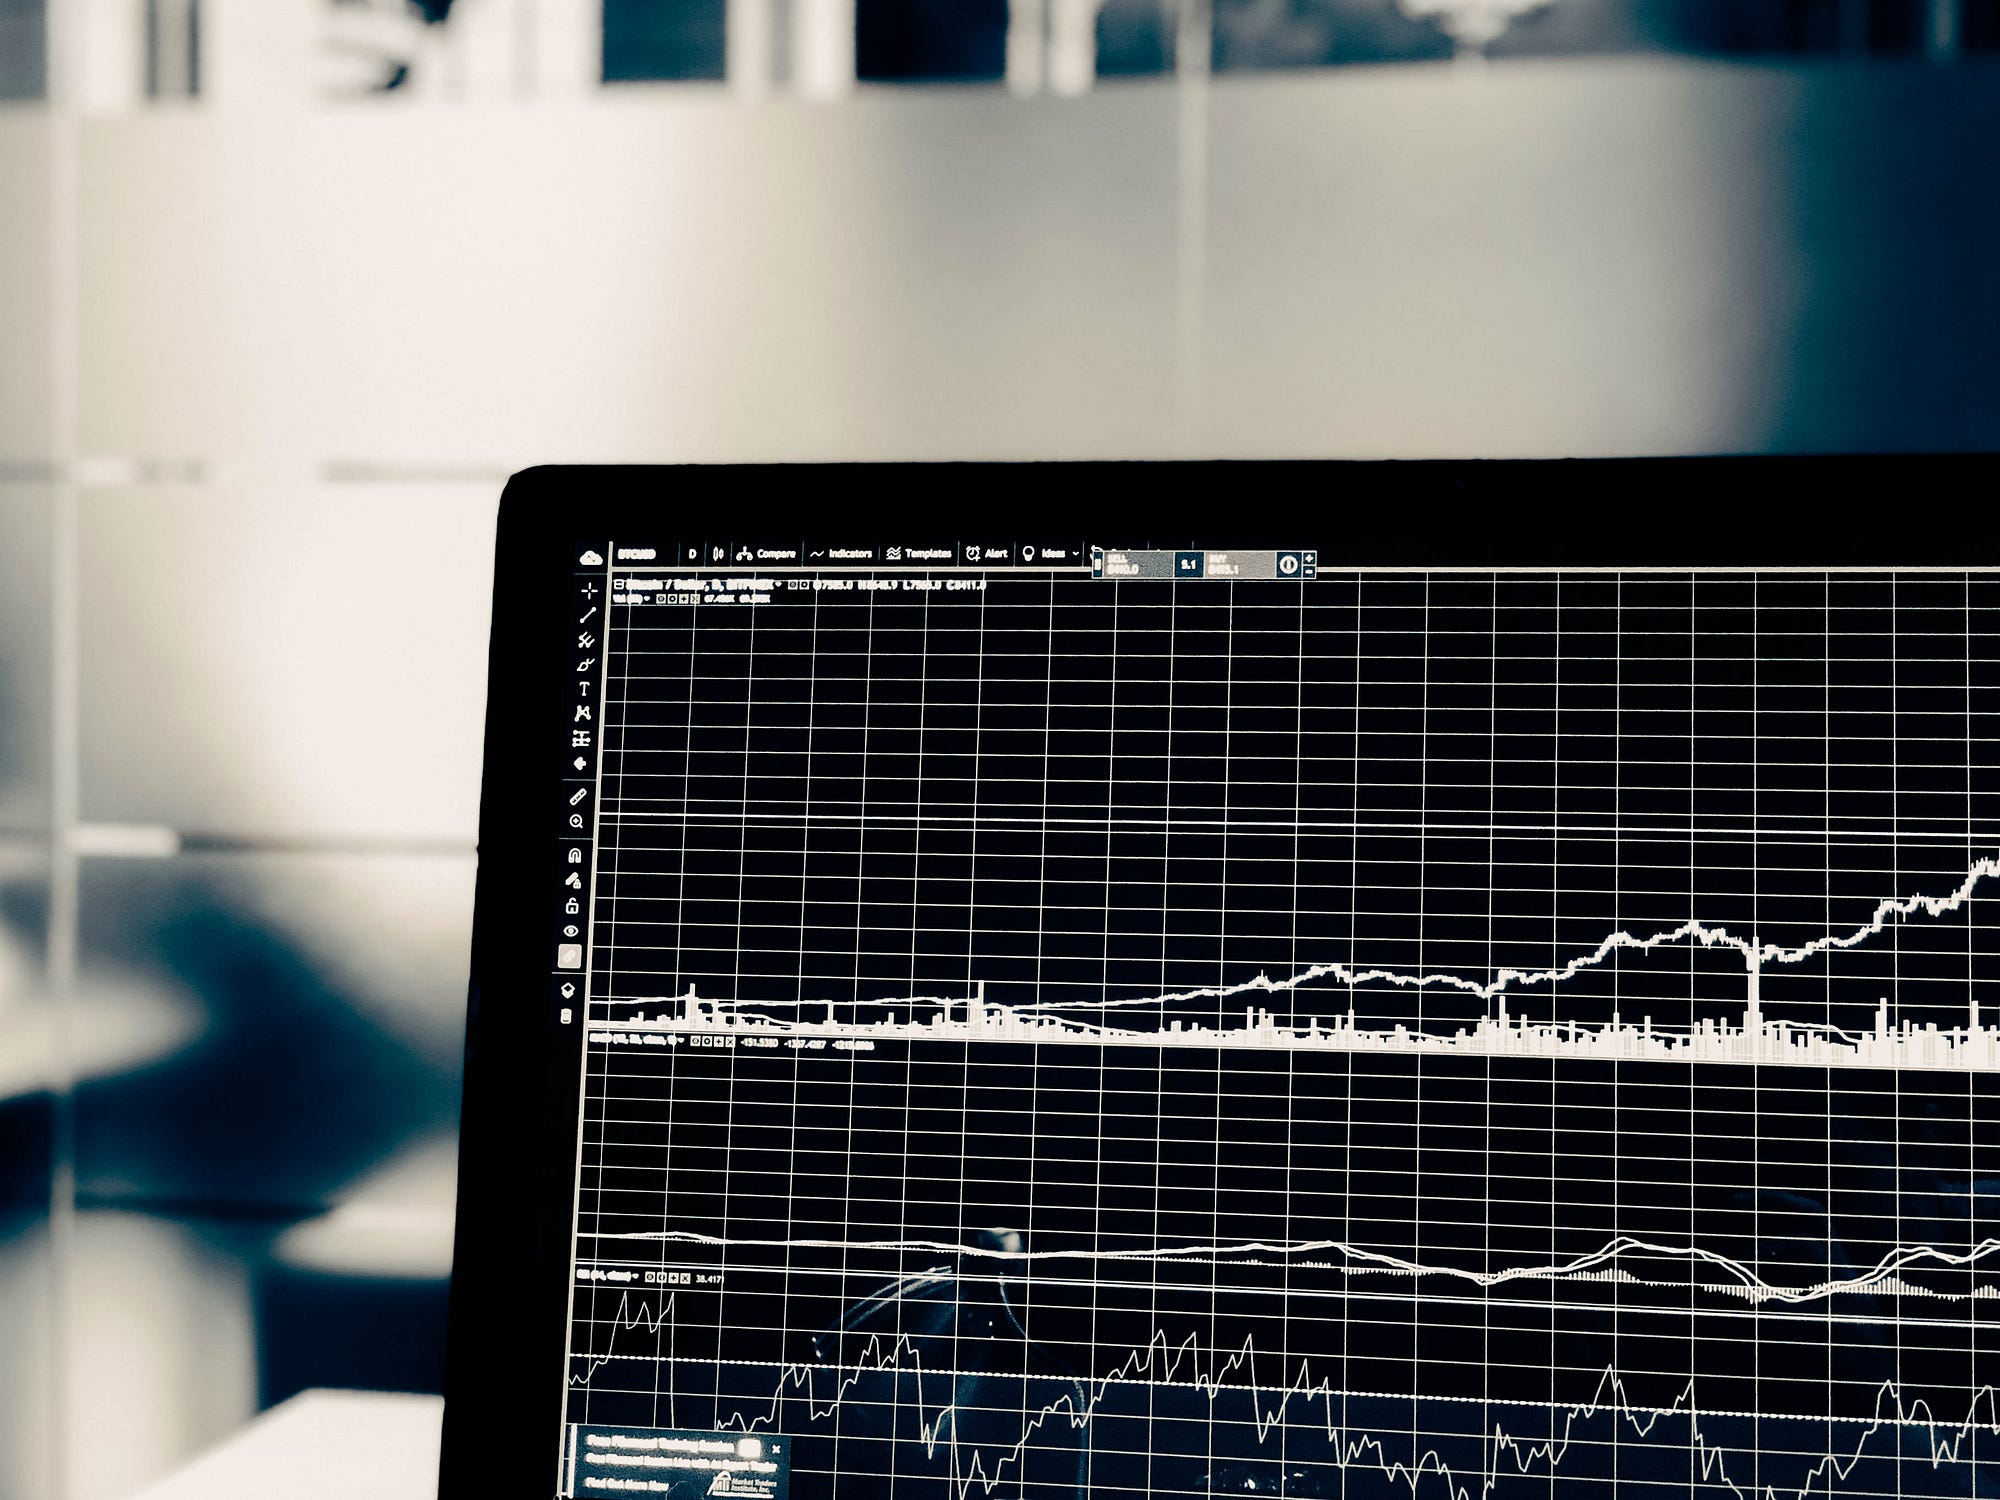

## Time Series Generator

In [21]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

549-12=537

In [22]:
len(generator)

537

In [23]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [24]:
X, y = generator[0]

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


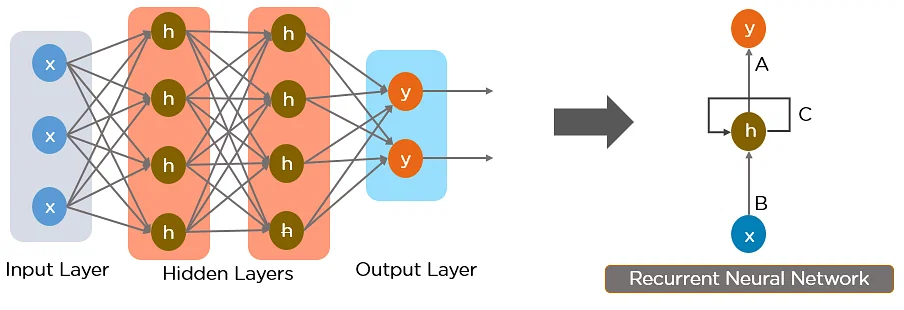

# Modelling & Model Performance

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [27]:
train_scaled.shape

(549, 1)

In [28]:
n_features = train_scaled.shape[1]
n_features

1

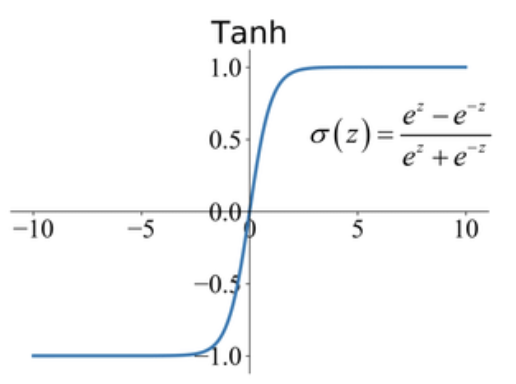

## with "tanh" activation function

In [29]:
model = Sequential()
model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(LSTM(16, activation = 'tanh'))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

LSTM (Uzun Kısa-Termli Hafıza) katmanı, zaman serileri veya ardışık veriler gibi sıralı veri yapılarının analizinde kullanılan bir tür yapay sinir ağı katmanıdır. LSTM'nin en önemli özelliklerinden biri, gizli hücrelerinde geçmiş bilgileri koruyabilmesidir.

Bir LSTM katmanı, genellikle ardışık zaman adımlarının işlenmesi için kullanılır. Örneğin, bir zaman serisi tahminlemesi yaparken, LSTM katmanı her bir zaman adımında mevcut zaman adımındaki veriyi alır ve bir sonraki zaman adımının tahminini yapmak için bu veriyle birlikte önceki zaman adımlarındaki bilgileri kullanır.

Eğer return_sequences=True olarak ayarlanırsa, LSTM katmanı her zaman adımından tam bir zaman serisi çıktısı üretir. Yani, her bir zaman adımında bir çıktı vektörü elde edilir ve bu çıktılar ardışık olarak bir sonraki LSTM katmanına veya çıktı katmanına geçirilebilir. Bu durumda, LSTM katmanının her zaman adımı için bir çıktı oluşturması ve sonuç olarak tam bir zaman serisi çıktısı sağlaması beklenir.

Bu özellik, birden çok LSTM katmanıyla birlikte kullanıldığında zaman serisi verilerini daha derin bir şekilde analiz etmek ve daha karmaşık ilişkileri yakalamak için kullanılabilir. Ayrıca, bu çıktıları bir çıktı katmanına doğrudan bağlayarak tahminlemeler yapmak da mümkündür.

Özetlemek gerekirse, return_sequences=True ayarı, LSTM katmanının her zaman adımından tam bir zaman serisi çıktısı üretmesini sağlar, böylece ardışık zaman adımlarındaki ilişkileri daha etkili bir şekilde modelleyebiliriz.


Eğer return_sequences=False olarak ayarlanırsa, LSTM katmanı sadece son zaman adımında bir çıktı üretir. Yani, LSTM katmanının yalnızca en son zaman adımından gelen çıktıyı döndürmesi beklenir.

Bu durumda, LSTM katmanı sadece son zaman adımının özetini sağlar. Önceki zaman adımlarındaki bilgilerin korunması veya kullanılması yerine, sadece en son zaman adımındaki bilgileri kullanarak tahminler yapılır.

Bunun pratikteki etkisi, ardışık verilerdeki uzun vadeli bağımlılıkları ve ilişkileri modellemekte daha zorlanabileceğidir. Özellikle, zaman serilerindeki dinamik desenleri veya uzun vadeli trendleri yakalamak için LSTM'nin önceki zaman adımlarındaki bilgilere erişmesi ve bunları kullanması genellikle faydalıdır.

Ancak bazı durumlarda, yalnızca son zaman adımının çıktısı yeterli olabilir. Örneğin, zaman serisindeki son zaman adımının tek başına tahminlenmesi gereken bir senaryo veya LSTM katmanının bir başka katmana bağlanacağı ve daha karmaşık bir modelin parçası olacağı durumlarda return_sequences=False kullanılabilir.

Özetle, return_sequences=False ayarı, LSTM katmanının yalnızca son zaman adımında bir çıktı üretmesini sağlar ve önceki zaman adımlarındaki bilgilere erişimini kısıtlar. Bu durumda, zaman serisi analizinde uzun vadeli bağımlılıkları ve dinamik desenleri modellemekte sınırlamalar olabilir.

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

# EarlyStopping and Validation Generator

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

restore_best_weights=True parametresi, EarlyStopping işlemi sonunda en iyi performansı gösteren model ağırlıklarının geri yüklenmesini sağlar.

EarlyStopping, modelin eğitimini durdurmak için kullanılan bir gerileme durdurma yöntemidir. Belirli bir metriği (genellikle doğrulama kaybı) izleyerek, bu metriğin belirli bir süre boyunca iyileşmediği durumlarda eğitimi otomatik olarak sonlandırır. Bu, aşırı uyum (overfitting) durumlarını önlemek ve modelin genellemesini artırmak için kullanılan bir stratejidir.

restore_best_weights=True ayarı, EarlyStopping işlemi sonunda en iyi performans gösteren model ağırlıklarının geri yüklenmesini sağlar. Yani, EarlyStopping durduğunda, en düşük doğrulama kaybına sahip olan ağırlıklar kullanılarak modelin orijinal ağırlıkları geri yüklenir.

Bu özellik, eğitim sürecinin erken durmasına rağmen, en iyi performansı gösteren modelin ağırlıklarının korunmasını sağlar. Bu şekilde, modelin en iyi sonuçları verdiği noktadaki ağırlıklar kullanılarak daha sonra tahminlemeler veya değerlendirmeler yapılabilir.

Genel olarak, restore_best_weights=True kullanmak, EarlyStopping ile eğitilen modellerde en iyi performansı elde etmek için tavsiye edilen bir uygulamadır.

In [32]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [34]:
model.fit(generator,
            epochs = 20,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.0445 - val_loss: 0.0097
Epoch 2/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0294 - val_loss: 0.0059
Epoch 3/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0219 - val_loss: 0.0016
Epoch 4/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0156 - val_loss: 0.0014
Epoch 5/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0125 - val_loss: 0.0036
Epoch 6/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0123 - val_loss: 0.0012
Epoch 7/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0104 - val_loss: 0.0015
Epoch 8/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0090 - val_loss: 0.0022
Epoch 9/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0086 - val_loss: 0.0023
Epoch 10/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0079 - val_loss: 0.0019
Epoch 11/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0071 - val_loss: 0.0020


<Axes: >

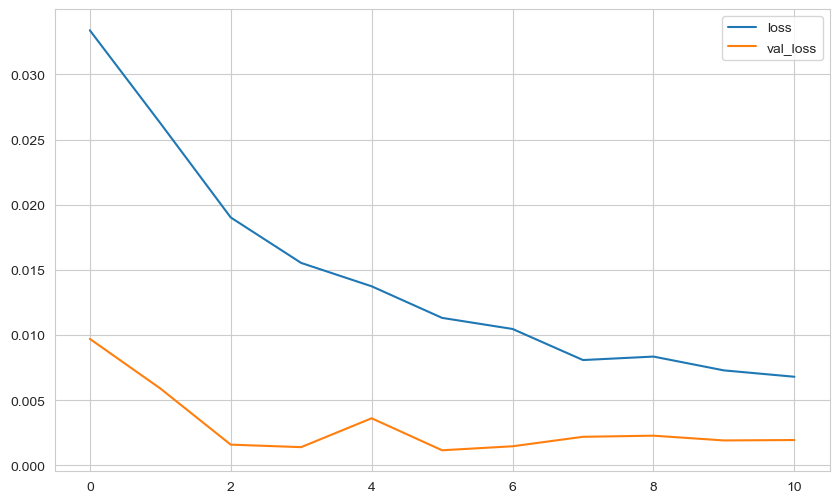

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

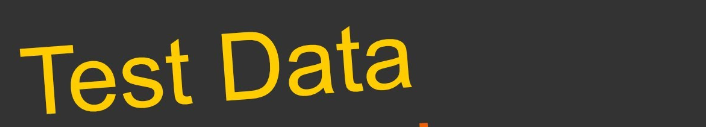

### Evaluation on Test Data

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [38]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Bu kod bloğu, bir modelin eğitimi tamamlandıktan sonra, tahminler yapmak için kullanılan bir döngü içermektedir. Aşağıda adım adım kodun ne yaptığı anlatılmıştır:

predictions_scaled adında bir boş liste tanımlanır. Bu liste, ölçeklendirilmiş tahmin değerlerini depolamak için kullanılacak.

first_eval_batch, eğitim veri setinin son length adet öğesini içeren bir dilimleme işlemi kullanılarak oluşturulur. Bu, tahminlerin başlangıç noktasını belirlemek için kullanılacaktır. train_scaled veri setinin son length satırı, modelin tahmin yapmaya başlamak için kullandığı ilk girdi olarak alınır.

current_batch değişkeni, first_eval_batch üzerinde bir şekle dönüştürülür. Bu, tahmin yapmak için kullanılacak olan mevcut girdiyi temsil eder. Bu döngünün her adımında güncellenecektir.

Bir döngü başlatılır ve bu döngü length adımı kadar devam eder.

İçerideki kod bloğu, modelden tahminler yapmak için mevcut girdi üzerinde model.predict() işlevini kullanır. current_batch üzerinde tahmin yapılır ve current_pred değişkenine atılır. Bu tahmin, ölçeklendirilmiş bir değerdir.

current_pred değeri, predictions_scaled listesine eklenir. Böylece, her adımda yapılan tahminler bu listede saklanır.

current_batch güncellenir. Tahmin değeri, current_batch içine eklenir ve ilk değeri çıkarılır. Bu şekilde, tahminlerin ardışık olarak gerçekleşmesi ve yeni tahminlerin girdi olarak kullanılması sağlanır.

Bu kod bloğu, modelin son eğitim verilerine dayanarak bir öngörü başlatır ve ardışık olarak yeni tahminler yapar. Tahminler, predictions_scaled listesinde depolanır ve daha sonra ölçeklendirilmiş halleri kullanılarak geri dönüşüme tabi tutulabilir. Bu şekilde, modelin ardışık tahminler yapma yeteneği gösterilmiş olur.

In [39]:
current_pred

array([[0.27333012]], dtype=float32)

In [40]:
current_batch

array([[[0.26112872],
        [0.20405483],
        [0.22461832],
        [0.3301658 ],
        [0.42720094],
        [0.46444049],
        [0.47502759],
        [0.46295881],
        [0.46438563],
        [0.41179645],
        [0.35299569],
        [0.27333012]]])

Görünüşe göre current_batch ve predictions_scaled listesi ilk başta aynı değeri içeriyor. Bunun nedeni, ilk tahminin, modelin başlangıç girdisi olan first_eval_batch üzerinde yapılmış olmasıdır. İlk tahmin, current_pred değişkenine atıldıktan sonra predictions_scaled listesine eklenir.

Daha sonra döngü, current_batch üzerinde tahmin yapmak ve yeni tahmin değerini current_pred olarak güncellemek için devam eder. Ancak, current_batch güncellenirken, önceki tahmin değeri yeni current_batch'in sonuna eklenirken, ilk değeri atılır. Bu nedenle, her bir döngü adımında bir önceki tahmin değeri current_batch içinde yer alır.

Sonuç olarak, ilk başta current_batch ve predictions_scaled listesi aynı değeri içerir, ancak döngünün her adımında current_batch güncellenirken yeni tahmin değeri current_pred eklendiği için predictions_scaled listesi tahmin değerlerini saklar.

Bu durum, ardışık tahminler yapmanın mantığını yansıtmaktadır. Her bir tahmin, bir sonraki tahmin için girdi olarak kullanılmak üzere current_batch içine eklenir. Bu şekilde, modelin ardışık tahminler yapması sağlanır.

In [41]:
predictions_scaled

[array([0.26112872], dtype=float32),
 array([0.20405483], dtype=float32),
 array([0.22461832], dtype=float32),
 array([0.3301658], dtype=float32),
 array([0.42720094], dtype=float32),
 array([0.4644405], dtype=float32),
 array([0.4750276], dtype=float32),
 array([0.4629588], dtype=float32),
 array([0.46438563], dtype=float32),
 array([0.41179645], dtype=float32),
 array([0.3529957], dtype=float32),
 array([0.27333012], dtype=float32)]

In [42]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.07328366593010922 
mse: 0.007201218748956111 
rmse: 0.08485999498560032


### Inverse Transformation and Comparing


RNN (Recurrent Neural Network) ile yapılan tahminler genellikle ölçeklendirme işlemi uygulanarak gerçek veri ölçeğine dönüştürülür. Bu nedenle, tahminleri gerçek ölçekli değerlere dönüştürmek için "Inverse Transformations" (ters dönüşüm) adı verilen bir işlem yapılır.

Önceden tahmin edilen değerler predictions_scaled adlı bir listede bulunur. Bu tahminler, ölçeklendirme işlemi uygulanmış halleridir. Gerçek değerlere dönüştürmek için, bu tahminlerin ölçeklendirme işlemini geri almak gerekmektedir.

scaler.inverse_transform işlevi, ölçeklendirme işlemini geri alarak tahminlerin gerçek ölçekli değerlerini elde etmek için kullanılır. Bu işlev, tahminleri ters ölçeklendirme işlemine tabi tutarak gerçek değerlere dönüştürür.

Sonuç olarak, predictions_scaled listesindeki tahminlerin gerçek ölçekli değerlerini elde etmek için scaler.inverse_transform işlevi kullanılır ve sonuçlar predictions adlı yeni bir değişkende saklanır. Bu sayede, tahminler gerçek veri ölçeğinde karşılaştırma ve değerlendirme yapmak için kullanılabilir.

In [43]:
predictions = scaler.inverse_transform(predictions_scaled)

In [44]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

Production  Predictions_tanh
DATE                                    
2017-10-01      90.473            94.569
2017-11-01      77.438            86.720
2017-12-01      75.812            89.548
2018-01-01      83.434           104.062
2018-02-01      99.490           117.406
2018-03-01     107.315           122.527
2018-04-01     112.431           123.983
2018-05-01     110.354           122.323
2018-06-01     124.584           122.519
2018-07-01     117.222           115.288
2018-08-01     112.678           107.202
2018-09-01     103.312            96.246

<Axes: xlabel='DATE'>

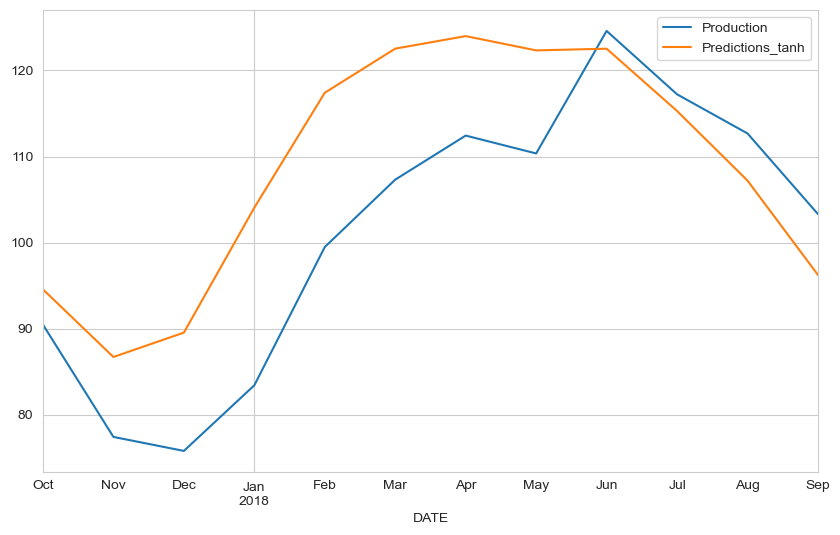

In [45]:
compare.plot()

In [46]:
eval_metrics(compare.Production, compare.Predictions_tanh)


mae: 10.077522708346448 
mse: 136.17557002246676 
rmse: 11.66942886445034


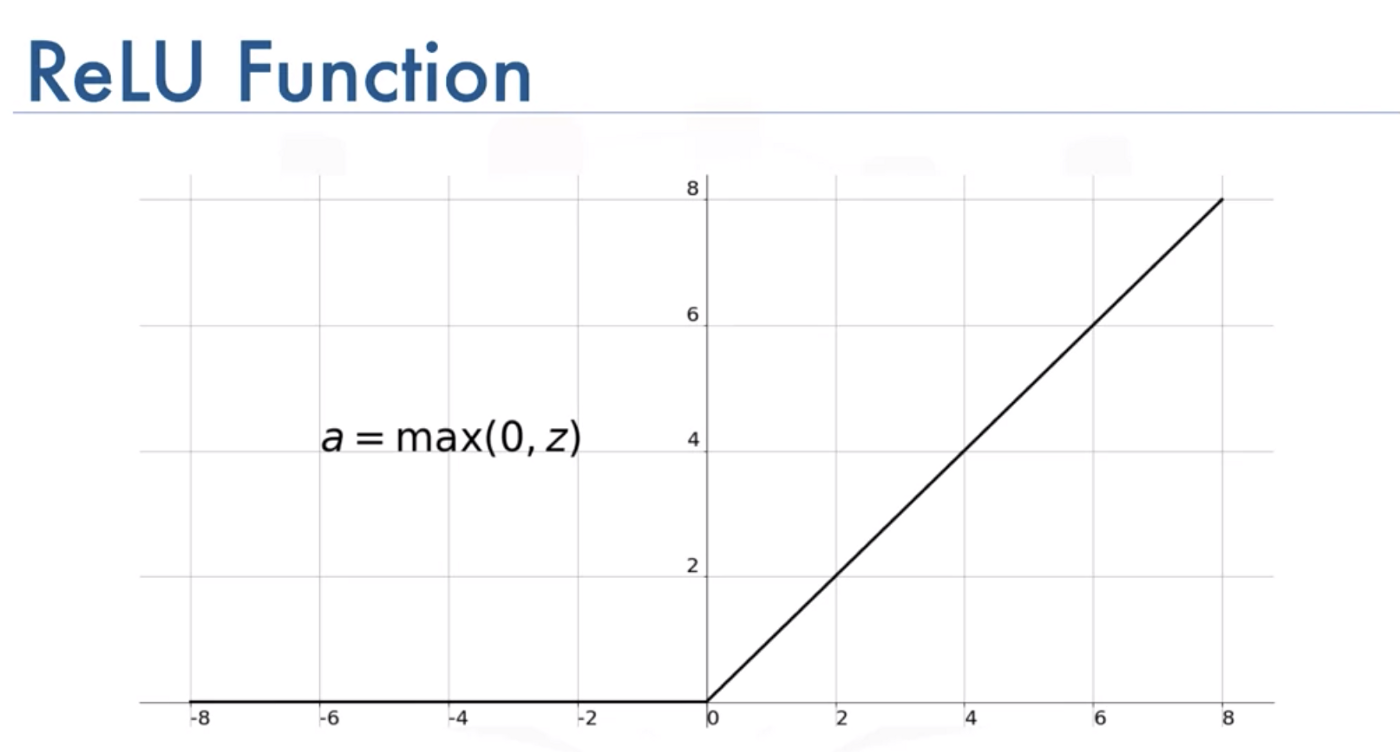

## with "relu" activation function

In [47]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 12, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [51]:
model.fit(generator,
            epochs = 20,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0485 - val_loss: 0.0044
Epoch 2/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0153 - val_loss: 0.0033
Epoch 3/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0080 - val_loss: 0.0056
Epoch 4/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0074 - val_loss: 0.0030
Epoch 5/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0077 - val_loss: 0.0017
Epoch 6/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 7/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0064 - val_loss: 0.0024
Epoch 8/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 9/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0080 - val_loss: 0.0028
Epoch 10/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0065 - val_loss: 0.0026


<Axes: >

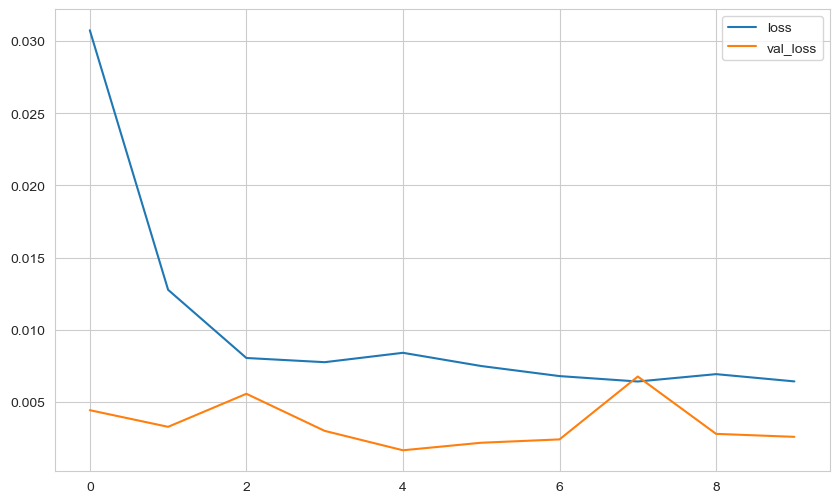

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [53]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


### Inverse Transformation and Comparing

In [54]:
predictions = scaler.inverse_transform(predictions_scaled)

In [55]:
compare['Predictions_relu'] = predictions
compare

Production  Predictions_tanh  Predictions_relu
DATE                                                      
2017-10-01      90.473            94.569            97.615
2017-11-01      77.438            86.720            86.122
2017-12-01      75.812            89.548            89.536
2018-01-01      83.434           104.062           102.506
2018-02-01      99.490           117.406           112.843
2018-03-01     107.315           122.527           116.857
2018-04-01     112.431           123.983           117.380
2018-05-01     110.354           122.323           117.504
2018-06-01     124.584           122.519           119.305
2018-07-01     117.222           115.288           116.323
2018-08-01     112.678           107.202           110.224
2018-09-01     103.312            96.246            99.093

<Axes: xlabel='DATE'>

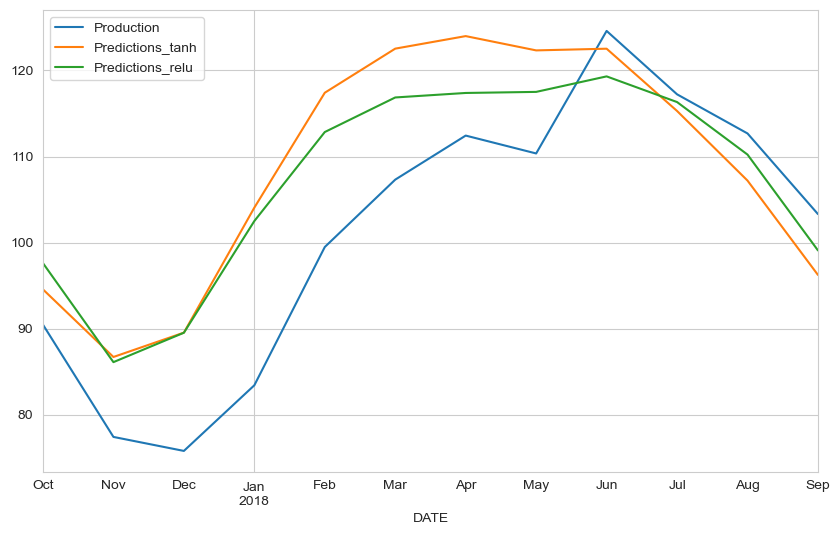

In [56]:
compare.plot()

In [57]:
eval_metrics(compare.Production, compare.Predictions_relu)


mae: 8.038787768269826 
mse: 89.66386125555958 
rmse: 9.469100340346996


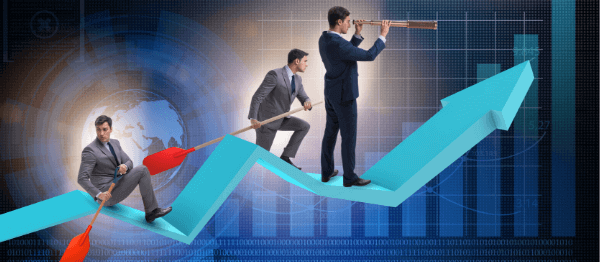

# Retrain and Forecasting - Create Final Model with Full Data

In [58]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [59]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [60]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(generator, epochs=20)

Epoch 1/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0477
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0135
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0077
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0084
Epoch 5/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0071
Epoch 6/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0059
Epoch 7/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0057
Epoch 8/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0063
Epoch 9/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0062
Epoch 10/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0052
Epoch 11/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0064
Epoch 12/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0062
Epoch 13/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0052
Epoch 14/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0054
Epoch 15/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 8

In [61]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [62]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 86.11592817],
       [ 78.72145868],
       [ 77.18890784],
       [ 84.8660243 ],
       [ 94.30555128],
       [108.86158764],
       [110.52361397],
       [112.72760711],
       [117.41388803],
       [106.64702926],
       [ 99.63683679],
       [ 96.13889607]])

In [63]:
df

Production
DATE                  
1972-01-01      59.962
1972-02-01      67.061
1972-03-01      74.235
1972-04-01      78.112
1972-05-01      84.764
...                ...
2019-05-01     114.561
2019-06-01     124.960
2019-07-01     110.263
2019-08-01     102.609
2019-09-01     101.587

[573 rows x 1 columns]

In [65]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [67]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

Forecast
2019-10-01    86.116
2019-11-01    78.721
2019-12-01    77.189
2020-01-01    84.866
2020-02-01    94.306
2020-03-01   108.862
2020-04-01   110.524
2020-05-01   112.728
2020-06-01   117.414
2020-07-01   106.647
2020-08-01    99.637
2020-09-01    96.139

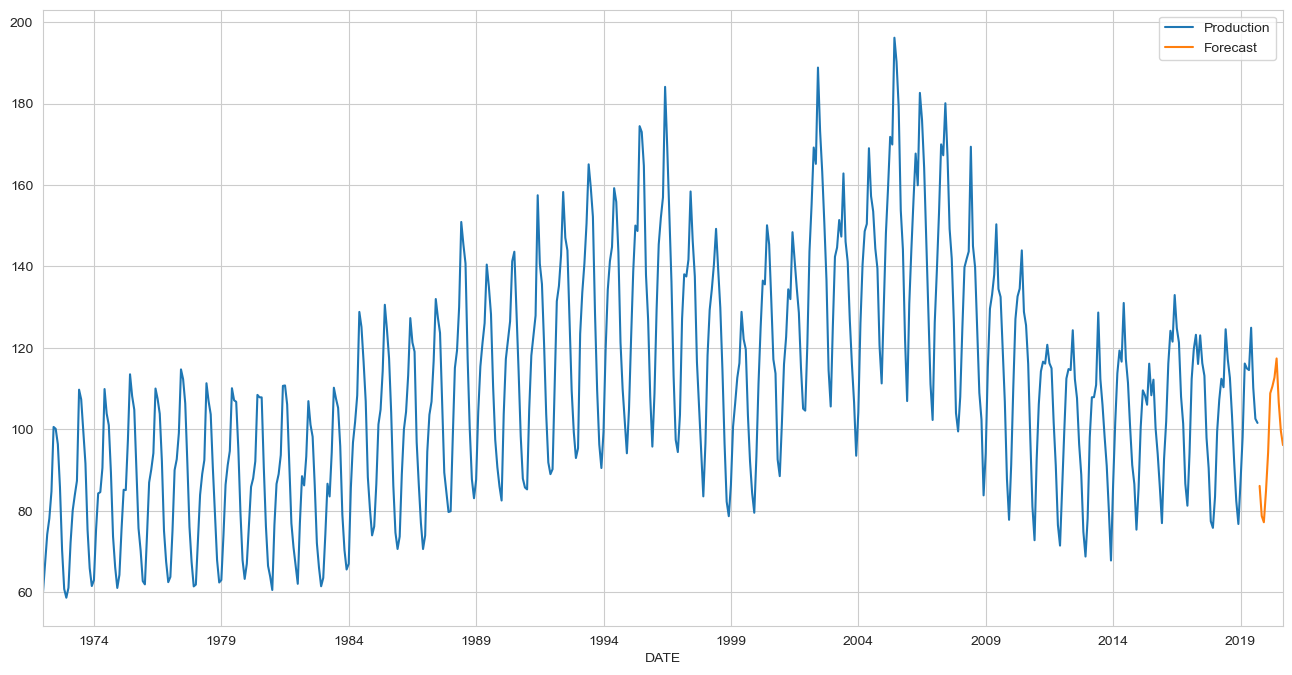

In [68]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

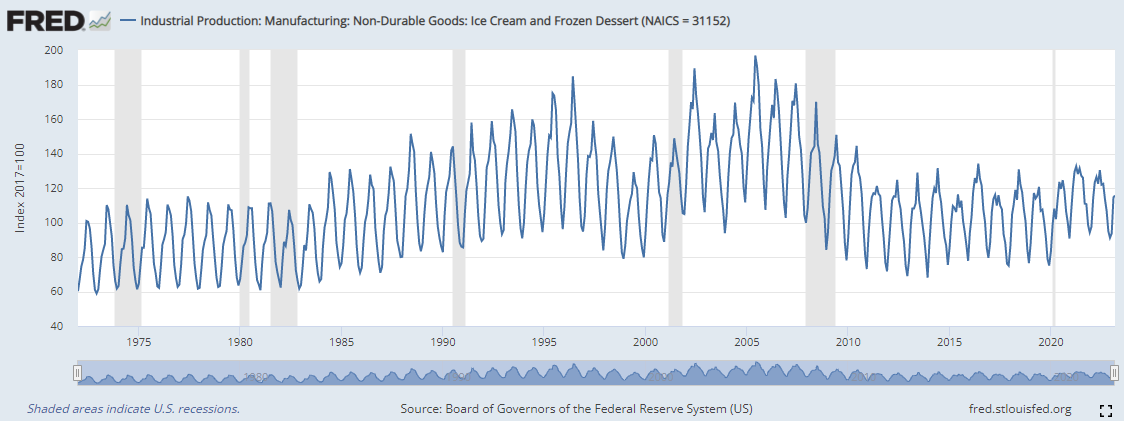

(576.0, 620.0)

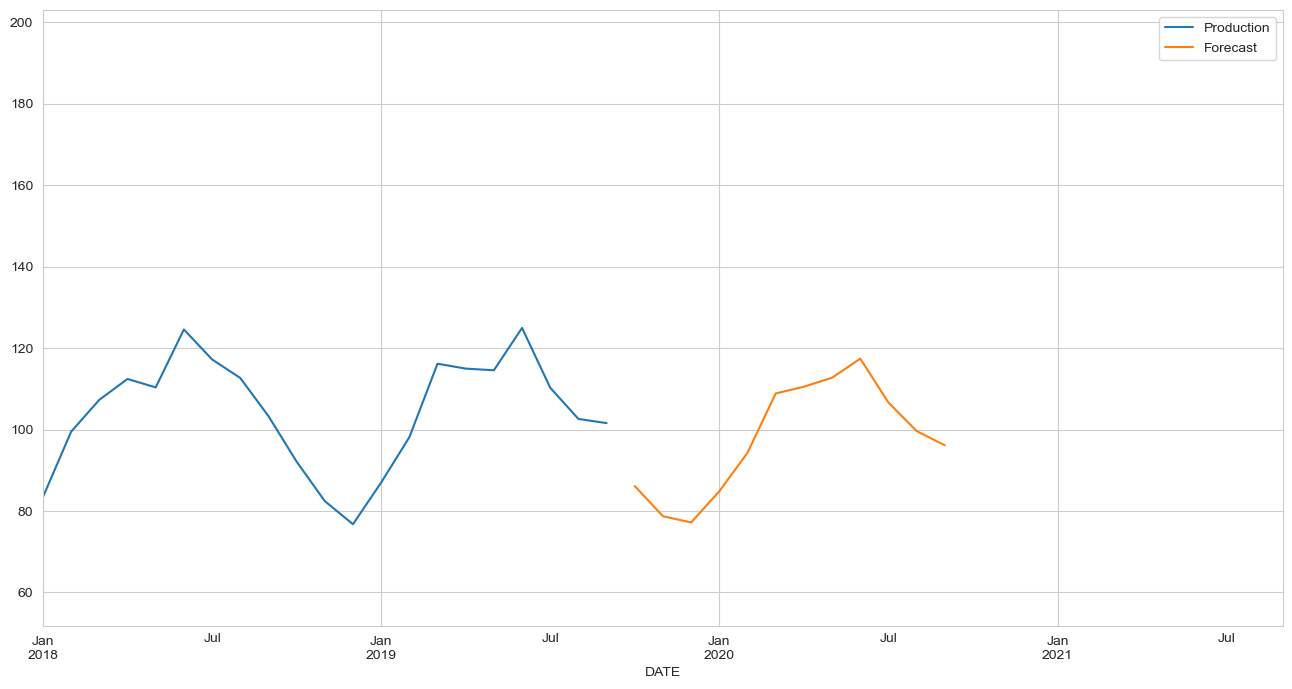

In [70]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

In [71]:
from keras.models import load_model

# Modeli kaydetme
model.save('final_model2.h5')

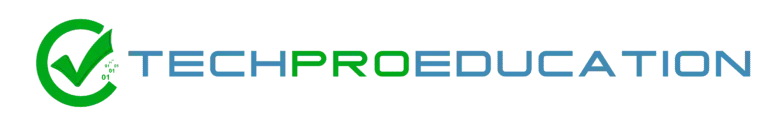